## Energy Dashboard

The **goal** is to build a dashboard of building energy efficiency.

This is our scenario: Imagine a property owner wants to estimate which of their buildings are most likely to consume the most amount of energy. They would need to know what aspects of the building influence the energy cost the most in order to better understand their energy consumption. In order to give answer to these questions there are a few things to consider when analyzing a building:

1. What building qualities influence the energy usage most?

    - Relative Compactness
    - Building Height 
    - Wall Area
    - Glazing Area
    
2. How is the energy consumption measured?
    - Heating Load
    - Cooling Load
    
In this analysis, we will answer the question proposed in the scenario. This will be done via **multiple linear regression**.

**Data Set Information:**

"We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses..." [more info](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)


The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
1. X1 Relative Compactness
2. X2 Surface Area
3. X3 Wall Area
4. X4 Roof Area
5. X5 Overall Height
6. X6 Orientation
7. X7 Glazing Area
8. X8 Glazing Area Distribution
9. y1 Heating Load
10. y2 Cooling Load

In [26]:
# Utility 
import pandas as pd
import numpy as np

# Visualization 
%matplotlib inline
import seaborn as sns 
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt 

# Statistics
from scipy import stats
from scipy.stats import norm

# Modeling and Metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

### **Data Formatting**

In [12]:
df = pd.read_excel('ENB2012_data.xlsx')
df = df.rename(columns={'X1': 'Compactness','X2': 'Surface Area', 
                        'X3': 'Wall Area', 'X4': 'Roof Area',
                       'X5': 'Overall Height', 'X6': 'Orientation',
                       'X7': 'Glazing Area', 'X8': 'GA Distribution',
                       'Y1': 'Heating Load', 'Y2': 'Cooling Load'})

print('-------------------------')
print('Feature data types: \n', df.dtypes)
print('-------------------------')
print('Data frame shape: ', df.shape)
print('-------------------------')
print('Total null values: ', df.isnull().sum().sum())
print('-------------------------')
df.head()

-------------------------
Feature data types: 
 Compactness        float64
Surface Area       float64
Wall Area          float64
Roof Area          float64
Overall Height     float64
Orientation          int64
Glazing Area       float64
GA Distribution      int64
Heating Load       float64
Cooling Load       float64
dtype: object
-------------------------
Data frame shape:  (768, 10)
-------------------------
Total null values:  0
-------------------------


,Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,GA Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### **Exploratory Data Analysis**

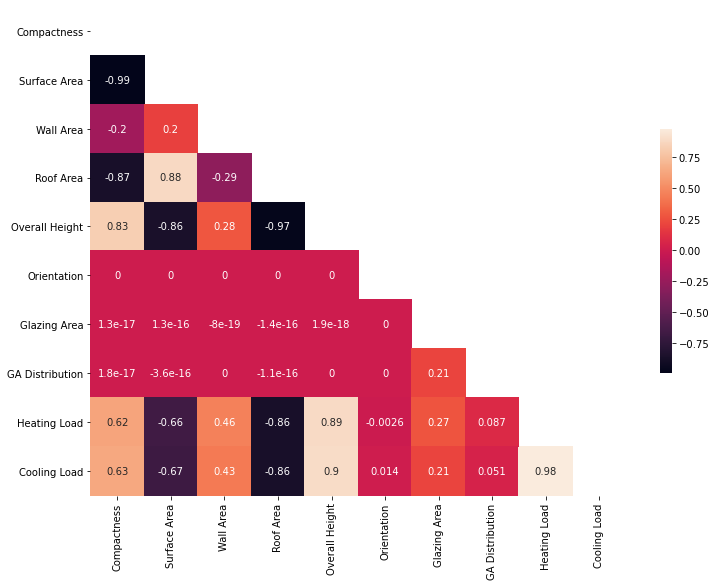

In [13]:
# Correlataion Matrix

corrmat = df.corr()
plt.subplots(figsize=(12,9))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, annot=True, cbar_kws={"shrink": .5}, mask=mask)
plt.show()

### Observations:
- To fit a multivariate linear regression model, we select those features that have a high correlation with the target values (Heating and Cooling Load).
- The features with the highest correlations to the target are Overall Height (.89, 90), Compactness (.62, .63), Wall Area (.46, .43), and Glazing Area (.27, .21).

### Training and Evaluating a Linear Regression Model

In [14]:
# Splitting the data
X = df[['Overall Height', 'Compactness', 'Wall Area', 'Glazing Area']].values
Y = df[['Heating Load', 'Cooling Load']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

# Creating the model.
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [33]:
# Evaluating the training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Evaluating the testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.096615287486888
R2 score is 0.8999789684012715


The model performance for testing set
--------------------------------------
RMSE is 3.1769033990653734
R2 score is 0.8912238903655241


### Interpreting the Results:

**RMSE:** The RMSE score for the training and testing sets were 3.1 and 3.18, meaning the values of the observed data was near the predicted data. 

**R2:** With an R2 score of .90 and .89 for the training and test sets respectively, we can conclude that the linear regression model fits the observed data values very well. The variance of the R2 scores are on a scale of 0.0 to 1.0, 1.0 meaning theres a perfect correlation between the values.

### Training and Evaluating a Ridge Regression Model

In [39]:
# Splitting the values
x = df[['Overall Height', 'Compactness', 'Wall Area', 'Glazing Area']].values
y = df[['Heating Load', 'Cooling Load']].values

# Scaling the inputs
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

# Train / test split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y,
                                                    test_size = 0.3)
  
# Creating and fitting the model
rr_model = Ridge(alpha = 0.5, normalize = False, tol = 0.001, \
              solver ='auto', random_state = 42)
rr_model.fit(x_train, y_train)

Ridge(alpha=0.5, random_state=42)

In [40]:
# Evaluating the training set
y_pred = rr_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_pred)))
r2 = r2_score(y_train, y_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Evaluating the testing set
y_test_pred = rr_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.066444502761992
R2 score is 0.9011949997290412


The model performance for testing set
--------------------------------------
RMSE is 3.2330769268359068
R2 score is 0.8902460043190004


### Interpreting the Results

**RMSE:** The RMSE score for the training and testing sets were 3.06 and 3.23, meaing the ridge regression model performed slightly better than the Linear model on the traning set, and slightly worse on the testing set.

**R2:** With R2 scores of just over .90 and .89, we can conclude that the ridge regression model fits the observed data values very simnilary to the linear regression model, if not, slightly better.